In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

frame = pd.read_csv("/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/june-7-2022/boof4.csv")

In [112]:
df = pd.DataFrame({"volume":frame.columns,
                   "mean": frame.mean().to_frame()[0].values,
                   "std": frame.std().to_frame()[0].values,
                   "var": frame.var().to_frame()[0].values,
                    })

In [46]:
frame.mean().to_frame()[0].values

array([  49.5       , 1056.13768375, 1117.66452128, 1146.83092619,
       1192.71525222, 1176.24627337, 1271.06907276, 1267.1332071 ,
       1312.66472581, 1310.90583305, 1264.96043287, 1319.56669428,
       1339.82149445, 1360.57293827, 1356.1433148 , 1375.7345839 ,
       1344.15132336, 1351.73957495, 1372.52629125, 1362.48470325,
       1381.84383606, 1387.41576943, 1429.47937283, 1430.74172696,
       1421.51489587, 1422.17213811, 1419.63186357, 1500.76957293,
       2048.34894609])

In [4]:
frame.volume *= (3/3.9)

In [5]:
frame

,Unnamed: 0,volume,perimeter,perimeter_mean,perimeter_stdev,contour_area,contour_area_average,contour_area_stdev
0,0,0.307692,1131.834361,1131.233040,0.940638,25360.0,25336.74,35.785820
1,1,0.384615,1188.227854,1188.585961,0.986119,27956.0,27970.96,50.341572
2,2,0.461538,1204.709202,1205.309682,0.993498,28745.0,28760.83,40.199326
3,3,0.538462,1234.080575,1233.511160,0.995750,30158.0,30141.00,48.100978
4,4,0.615385,1236.101718,1236.601441,0.998929,30277.5,30297.11,52.299792
5,5,0.692308,1255.677062,1255.208743,0.953450,31243.5,31219.91,45.437408
6,6,0.769231,1268.648142,1269.516784,0.964839,31896.0,31939.01,49.992294
7,7,0.846154,1284.578737,1285.639532,0.982151,32665.0,32757.11,57.538389
8,8,0.923077,1300.816481,1301.193834,0.915337,33551.0,33568.04,46.432949
9,9,1.000000,1307.345682,1307.932451,0.992091,33913.5,33930.49,45.653027


In [24]:
frame['00']

0     1050.803405
1     1051.861422
2     1057.973351
3     1061.548599
4     1050.484701
         ...     
95    1055.493461
96    1055.058140
97    1055.340489
98    1054.840801
99    1054.743960
Name: 00, Length: 100, dtype: float64

In [113]:
df = df.drop(28)
df = df.drop(0)
df= df.drop(1)
df = df.drop(14)
df = df.drop(27)

In [77]:
for key, group in df.groupby('volume'):
    #print(key)
    print(group)
# plt.plot(df['volume'], df['mean'], yerr=df['std'])

  volume         mean       std
2     05  1117.664521  0.897171
  volume         mean      std
3     06  1146.830926  1.52688
  volume         mean       std
4     07  1192.715252  1.508089
  volume         mean      std
5     08  1176.246273  1.49215
  volume         mean       std
6     09  1271.069073  1.426365
  volume         mean       std
7     10  1267.133207  1.483079
  volume         mean       std
8     11  1312.664726  4.112507
  volume         mean       std
9     12  1310.905833  2.559582
   volume         mean       std
10     13  1264.960433  6.420307
   volume         mean       std
11     14  1319.566694  3.774448
   volume         mean       std
12     15  1339.821494  3.952147
   volume         mean       std
13     16  1360.572938  2.397663
   volume         mean        std
14     17  1356.143315  18.565659
   volume         mean       std
15     18  1375.734584  5.626147
   volume         mean       std
16     19  1344.151323  2.815481
   volume         mean      

In [82]:
df.volume

2     05
3     06
4     07
5     08
6     09
7     10
8     11
9     12
10    13
11    14
12    15
13    16
14    17
15    18
16    19
17    20
18    21
19    22
20    23
21    24
22    25
23    26
24    27
25    28
26    29
27    30
Name: volume, dtype: object

/var/folders/5z/d1d_q74d1hd653s14vwq9v800000gn/T/ipykernel_3893/1724677498.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(df.volume, df["mean"], yerr=df["var"],fmt="o", marker='s', mfc='red',


<ErrorbarContainer object of 3 artists>

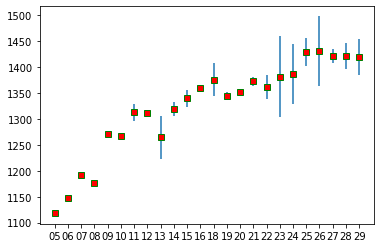

In [141]:
#fig, ax = plt.subplots()
plt.errorbar(df.volume, df["mean"], yerr=df["var"],fmt="o", marker='s', mfc='red',
         mec='green')#, ms=20, mew=4)

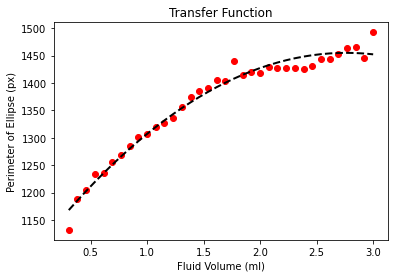

y=-47.642443x^2+263.212388x+(1091.529848)


In [29]:
# plt.plot(frame.volume, frame["perimeter_mean"], marker='s', mfc='red',
#          mec='green')#, ms=20, mew=4)

plt.plot(frame.volume,frame["perimeter"], 'ro')
x= frame.volume;
y=frame["perimeter"];
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
plt.plot(x,p(x),'k--',linewidth=2)
color = 0.8;
plt.ylabel('Perimeter of Ellipse (px)')
plt.xlabel('Fluid Volume (ml)')
plt.title("Transfer Function")
plt.show()
print( "y=%fx^2+%fx+(%f)"%(z[0],z[1],z[2]))

In [136]:
frame = frame.drop(26)